In [2]:
import os
os.chdir("C:\\Users\\Panu\\Downloads\\9781788295758_Code\\StatisticsforMachineLearning_Code\\Chapter04")


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score,classification_report

import matplotlib.pyplot as plt


hrattr_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [4]:
print(hrattr_data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0      

In [6]:
hrattr_data['Attrition_ind'] = 0
hrattr_data.loc[hrattr_data['Attrition']=='Yes','Attrition_ind'] = 1



# Creating Dummy Varibales

Dummy varibles are created for all seven categorical variables(shown here in alphabetical order),
which are Business Travle, Department, Education Field, Gender,JOb Role, Marital Status and Overtime.


We have ignored four variables from the analysis as they do not change across the observations, 
which are Employee count, Employee number, Over18, and Standard Hours:

# Dummy Variables for Categorical Variables

In [7]:
dummy_busnstrvl = pd.get_dummies(hrattr_data['BusinessTravel'], prefix='busns_trvl')
dummy_dept = pd.get_dummies(hrattr_data['Department'], prefix='dept')
dummy_edufield = pd.get_dummies(hrattr_data['EducationField'], prefix='edufield')
dummy_gender = pd.get_dummies(hrattr_data['Gender'], prefix='gend')
dummy_jobrole = pd.get_dummies(hrattr_data['JobRole'], prefix='jobrole')
dummy_maritstat = pd.get_dummies(hrattr_data['MaritalStatus'], prefix='maritalstat') 
dummy_overtime = pd.get_dummies(hrattr_data['OverTime'], prefix='overtime') 


# Continuous variables are separated and will be combined with the created dummpy variables later:


# Dummy Variables for Continuous 

In [8]:
continuous_columns = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
'YearsWithCurrManager']


In [9]:
hrattr_continuous = hrattr_data[continuous_columns]

In the following step, both derived dummy variables from categorical variables and straight continuous variables are combined

In [10]:
hrattr_continuous['Age'].describe()



count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [11]:
hrattr_data['BusinessTravel'].value_counts()


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [12]:
hrattr_data_new = pd.concat([dummy_busnstrvl,dummy_dept,dummy_edufield,dummy_gender,dummy_jobrole,
  dummy_maritstat,dummy_overtime,hrattr_continuous,hrattr_data['Attrition_ind']],axis=1)

Here,we have not removed one extra derived dummy variable for each categorical variable due to the reason that
multicollinearity does not create a problem in decision tree as it dones in either logistic or linear regression,
hence we can simply utilize all the derived variables in the rest of the project, as all the models utilize decision trees
as an underlying model, even after perfomring ensembles of it.

# Data Split by 70-30 for Train and Testing

Once basic data has prepared. it need to be split by 70-30 for train and testing purpose.

In [13]:
#Train and Test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(hrattr_data_new.drop(['Attrition_ind'], axis=1),hrattr_data_new['Attrition_ind'], train_size = 0.7, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Decision Tree Classifier

The DecisionTreeClassifier from scikit-learn has been utilized for modeling purpose, which is available in the tree submodelue.

In [14]:
from sklearn.tree import DecisionTreeClassifier

The parameters selected for the DT classifier are in the following code with spliting criterion as Gini,Maximum depth as 5,
maximum number of observation required for qualifyling split is 2, and the minimum samples that should be present in the 
terminal node is 1:

In [64]:
dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)

# Fit the model

In [65]:
dt_fit.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [67]:
print ("\nDecision Tree - Train Confusion Matrix\n\n",pd.crosstab(y_train,dt_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nDecision Tree - Train accuracy:",round(accuracy_score(y_train,dt_fit.predict(x_train)),3))
print ("\nDecision Tree - Train Classification Report\n",classification_report(y_train,dt_fit.predict(x_train)))

print ("\n\nDecision Tree - Test Confusion Matrix\n\n",pd.crosstab(y_test,dt_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nDecision Tree - Test accuracy:",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))
print ("\nDecision Tree - Test Classification Report\n",classification_report(y_test,dt_fit.predict(x_test)))




Decision Tree - Train Confusion Matrix

 Predicted    0   1
Actuall           
0          844   9
1           98  78

Decision Tree - Train accuracy: 0.896

Decision Tree - Train Classification Report
              precision    recall  f1-score   support

          0       0.90      0.99      0.94       853
          1       0.90      0.44      0.59       176

avg / total       0.90      0.90      0.88      1029



Decision Tree - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          361  19
1           49  12

Decision Tree - Test accuracy: 0.846

Decision Tree - Test Classification Report
              precision    recall  f1-score   support

          0       0.88      0.95      0.91       380
          1       0.39      0.20      0.26        61

avg / total       0.81      0.85      0.82       441



- By carefully observing the results, we can infer that, even though the test accuracy is high (84.6%), the precision and recall of
one category(Attrition=Yes) is low (precision = 0.39 and recall 0.20). 
- This could be a serious issue when management tries to use this model to provide some extra benefits proactively to the
employee with high chance pf attrition prior to actual attrition,  as this model is unable to indetify the real employees
who will be leaving.
- hence we neeed to look for other modifications; one way is to control the model by using class weights.
- By utilizing class weights, we can increase the importance of a particular class at the cost of an omcrease in other errors.

- For example, by increasing class weight to category 1, we can identify morre employees with the characteristics of actual attrition, but by doing so, we will mark some of the nonpotential churner employees as potential attriters(which should be acceptable)


- Another classical exmaple of the important use of class weights is, in banking scenarios.
- When giving loans, it is better to reject some good applications than accepting bad loans.
- Hence, even in this case, it is a better idea to use higher weightage to defaulters over non defaulters.

# Tuning Class weights in decision tree classifier

- In the following code, class weights are tuned to see the performeance change in decision tree with the same parameters.

- A dummy DataFrame is created to save all the results of various precision-recall details of combinations.

In [78]:
dummyarray = np.empty((6,10))#six row and ten columns
dt_wttune = pd.DataFrame(dummyarray)

In [79]:
dummyarray

array([[0.000e+000, 4.941e-324, 9.881e-324, 1.482e-323, 1.976e-323,
        2.470e-323, 2.964e-323, 3.458e-323, 3.953e-323, 4.447e-323],
       [4.941e-323, 5.435e-323, 5.929e-323, 6.423e-323, 6.917e-323,
        7.411e-323, 7.905e-323, 8.399e-323, 8.893e-323, 9.387e-323],
       [9.881e-323, 1.038e-322, 1.087e-322, 1.136e-322, 1.186e-322,
        1.235e-322, 1.285e-322, 1.334e-322, 1.383e-322, 1.433e-322],
       [7.115e-321, 7.119e-321, 7.124e-321, 7.129e-321, 7.134e-321,
        7.139e-321, 7.144e-321, 7.149e-321, 7.154e-321, 7.159e-321],
       [7.164e-321, 7.169e-321, 7.174e-321, 7.179e-321, 7.184e-321,
        7.189e-321, 7.194e-321, 7.199e-321, 7.203e-321, 7.208e-321],
       [7.213e-321, 7.218e-321, 7.223e-321, 7.228e-321, 7.233e-321,
        7.238e-321, 7.243e-321, 7.248e-321, 7.253e-321, 7.258e-321]])

In [80]:
dt_wttune

,0,1,2,3,4,5,6,7,8,9
0,0.000000e+00,4.940656e-324,9.881313e-324,1.482197e-323,1.976263e-323,2.470328e-323,2.964394e-323,3.458460e-323,3.952525e-323,4.446591e-323
1,4.940656e-323,5.434722e-323,5.928788e-323,6.422853e-323,6.916919e-323,7.410985e-323,7.905050e-323,8.399116e-323,8.893182e-323,9.387247e-323
2,9.881313e-323,1.037538e-322,1.086944e-322,1.136351e-322,1.185758e-322,1.235164e-322,1.284571e-322,1.333977e-322,1.383384e-322,1.432790e-322
3,7.114545e-321,7.119486e-321,7.124427e-321,7.129367e-321,7.134308e-321,7.139249e-321,7.144189e-321,7.149130e-321,7.154071e-321,7.159011e-321
4,7.163952e-321,7.168893e-321,7.173833e-321,7.178774e-321,7.183714e-321,7.188655e-321,7.193596e-321,7.198536e-321,7.203477e-321,7.208418e-321
5,7.213358e-321,7.218299e-321,7.223240e-321,7.228180e-321,7.233121e-321,7.238062e-321,7.243002e-321,7.247943e-321,7.252884e-321,7.257824e-321


- Marics to be considered for capture are weight for zero and one category,for example, if the weight for zero category given is 0.2
- then automatically, weights for the one should be 0.8, as total weights should be equal to 1, training and testing accuracy, precison for
zero category, one category, and overall.
- Simiarly, recall for zero category, one category, and overall are also calculated.


In [81]:
dt_wttune.columns = ["zero_wght","one_wght","tr_accuracy","tst_accuracy","prec_zero","prec_one",
                     "prec_ovll","recl_zero","recl_one","recl_ovll"]



- Weights for the zero category are varified from 0.01 to 0.5, as we know we do not want to explor cases where the zero category
will be given higher weightages than one category:

In [82]:
zero_clwghts = [0.01,0.1,0.2,0.3,0.4,0.5]


In [95]:
for i in range(len(zero_clwghts)):
    clwght = {0:zero_clwghts[i],1:1.0-zero_clwghts[i]}
    dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,
                                    min_samples_leaf=1,random_state=42,class_weight = clwght)
    dt_fit.fit(x_train,y_train)
    dt_wttune.loc[i, 'zero_wght'] = clwght[0]       
    dt_wttune.loc[i, 'one_wght'] = clwght[1]     
    dt_wttune.loc[i, 'tr_accuracy'] = round(accuracy_score(y_train,dt_fit.predict(x_train)),3)    
    dt_wttune.loc[i, 'tst_accuracy'] = round(accuracy_score(y_test,dt_fit.predict(x_test)),3)    
        
    clf_sp = classification_report(y_test,dt_fit.predict(x_test)).split()
    dt_wttune.loc[i, 'prec_zero'] = float(clf_sp[5])   
    dt_wttune.loc[i, 'prec_one'] = float(clf_sp[10])   
    dt_wttune.loc[i, 'prec_ovll'] = float(clf_sp[17])   
    
    dt_wttune.loc[i, 'recl_zero'] = float(clf_sp[6])   
    dt_wttune.loc[i, 'recl_one'] = float(clf_sp[11])   
    dt_wttune.loc[i, 'recl_ovll'] = float(clf_sp[18])
    print ("\nClass Weights",clwght,"Train accuracy:",round(accuracy_score(y_train,dt_fit.predict(x_train)),3),"Test accuracy:",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))
    print ("Test Confusion Matrix\n\n",pd.crosstab(y_test,dt_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      




Class Weights {0: 0.01, 1: 0.99} Train accuracy: 0.342 Test accuracy: 0.272
Test Confusion Matrix

 Predicted   0    1
Actuall           
0          65  315
1           6   55

Class Weights {0: 0.1, 1: 0.9} Train accuracy: 0.806 Test accuracy: 0.732
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          282  98
1           20  41

Class Weights {0: 0.2, 1: 0.8} Train accuracy: 0.871 Test accuracy: 0.83
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          341  39
1           36  25

Class Weights {0: 0.3, 1: 0.7} Train accuracy: 0.881 Test accuracy: 0.839
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          345  35
1           36  25

Class Weights {0: 0.4, 1: 0.6} Train accuracy: 0.894 Test accuracy: 0.832
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          346  34
1           40  21

Class Weights {0: 0.5, 1: 0.5} Train accuracy: 0.896 Test accuracy: 0.846
Test Confusion Matrix

 Predicted    0   1
Actual

- From the preceding output, we can see that at class weight values of 0.3(for zero) and 0.7(for one) it is indentifying a
higher number of attriters(25 out of 61) without compromising test accuracy 83.9% using decsion trees methodology:

# Bagging Classifier

- Decision Tree suffer from high variance.
- Which means if we split the training data into two random parts separately and fit decision trees for each sample, the rules
obtained would be very different.
- Whereas low variance and high bias models, such as linear or ligistic regression, will produce similar results across both samples.
- Bagging refers to bootstrap aggregation( repeated sampling with replacement and perform aggregation of results to be precise),
which is genreal purpose methodology to reduce the variance of models.

- In bagging procedure, rows are sampled with selecting all columns/variables and fitting a individual trees for each sample.
- Whereas, in random forest, both rows and columns would be sampled.

********************************************************************************************************************************

- In the following code same HR data has been used for Bagging classifier in order to compare the results apple with apple with
respect to decision treee

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

********************************************************************************************************************************

- The base classifier used here is Decision Tree with the same parameters setting that we used in the decision tree example:

----------------------------------------------------

In [98]:
dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_impurity_split=2,min_samples_leaf=1,random_state=42,
                               class_weight = {0:0.3,1:0.7})

- Parameters used in Bagging is n_estimators to represent the number of individual decision trees used as 5000, maximum samples
and features selected are 0.67 and 1.0 respectively, which means it will select 2/3 of observations for each tree and all the features
.


In [99]:
bag_fit = BaggingClassifier(base_estimator=dt_fit,n_estimators=5000,max_features=1.0,bootstrap=True,
                           bootstrap_features=False, n_jobs = -1, random_state=42)

In [100]:
bag_fit.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=2,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42,
                                class_weight = {0:0.3,1:0.7})

bag_fit = BaggingClassifier(base_estimator= dt_fit,n_estimators=5000,max_samples=0.67,max_features=1.0,
                            bootstrap=True,bootstrap_features=True,n_jobs=-1,random_state=42)

bag_fit.fit(x_train, y_train)

print ("\nBagging - Train Confusion Matrix\n\n",pd.crosstab(y_train,bag_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nBagging- Train accuracy",round(accuracy_score(y_train,bag_fit.predict(x_train)),3))
print ("\nBagging  - Train Classification Report\n",classification_report(y_train,bag_fit.predict(x_train)))

print ("\n\nBagging - Test Confusion Matrix\n\n",pd.crosstab(y_test,bag_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nBagging - Test accuracy",round(accuracy_score(y_test,bag_fit.predict(x_test)),3))
print ("\nBagging - Test Classification Report\n",classification_report(y_test,bag_fit.predict(x_test)))



Bagging - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          846    7
1           72  104

Bagging- Train accuracy 0.923

Bagging  - Train Classification Report
              precision    recall  f1-score   support

          0       0.92      0.99      0.96       853
          1       0.94      0.59      0.72       176

avg / total       0.92      0.92      0.92      1029



Bagging - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          372   8
1           48  13

Bagging - Test accuracy 0.873

Bagging - Test Classification Report
              precision    recall  f1-score   support

          0       0.89      0.98      0.93       380
          1       0.62      0.21      0.32        61

avg / total       0.85      0.87      0.85       441



- After analyzing the results from bagging, the test accuracy obtained was 87.3%, whereas for decision tree it was 84.6%.
- Comparing the number of actual attrited employees identified, there were 13 in bagging, whereas in decision tree 12, but
the number of 0 classified as 1 significantly reduced to 8 compared with 19 in decision tree.
- Over all bagging improves performance over the single tree:

# Random Forest Classifier

- Random forest provide an improvement over bagging by doing a small tweak that utilizes de-correlectd trees.
- In bagging, we build a number of decision tress on bootstrapped samples from traing data, but the one big drawback with
bagging techniques is that it selectes all the variables.
- By doing so , in each decision tree, order of candidate/variable chosen to split remians more or less the same for all the individual
trees, which took correlated with each other.
- Variaance reduction on correlated individual entites does not work effectively while aggregating them.

- In random forest duing bootstraping, samples were drawan from training data; not just simple the second and third observation randomley
selcted, similar to bagging, but it also selctes the few predictores/columns out of all predictores.

*********************************************************************************************************************************

In [105]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

- The parameters used in random forest are:
    - n_estimators :- Representing the number of individual decision trees used is 5000,
    - maximun features selcted are auto, which means it will select sqrt(p) for classification and p/3 for regression automatically
    - Here is the straightforward classification problem though.
    - minimum samples per leaf provides the minimum number of observation required in the terminal node

In [106]:
rf_fit = RandomForestClassifier(n_estimators=5000, criterion="gini",max_depth=5,min_impurity_split=2,
                               bootstrap=True,max_features='auto',random_state=42,min_samples_leaf=1,
                               class_weight = {0:0.3,1:0.7})

In [128]:
#rf_fit.fit(x_train,y_train)

In [110]:
print ("\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit.predict(x_train)),3))
print ("\nRandom Forest  - Train Classification Report\n",classification_report(y_train,rf_fit.predict(x_train)))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test,rf_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit.predict(x_test)),3))
print ("\nRandom Forest - Test Classification Report\n",classification_report(y_test,rf_fit.predict(x_test)))




Random Forest - Train Confusion Matrix

 Predicted    0
Actuall       
0          853
1          176

Random Forest - Train accuracy 0.829


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Random Forest  - Train Classification Report
              precision    recall  f1-score   support

          0       0.83      1.00      0.91       853
          1       0.00      0.00      0.00       176

avg / total       0.69      0.83      0.75      1029



Random Forest - Test Confusion Matrix

 Predicted    0
Actuall       
0          380
1           61

Random Forest - Test accuracy 0.862

Random Forest - Test Classification Report
              precision    recall  f1-score   support

          0       0.86      1.00      0.93       380
          1       0.00      0.00      0.00        61

avg / total       0.74      0.86      0.80       441



- Random Forest classifier produced 87.8 % test accuracy compared with bagging 87.3% and also
indentifies 14 actually attrited employeee in contrast with bagging for which 13 attrited employee have been identified.

# Plot of Variable importance by mean decrease in gini

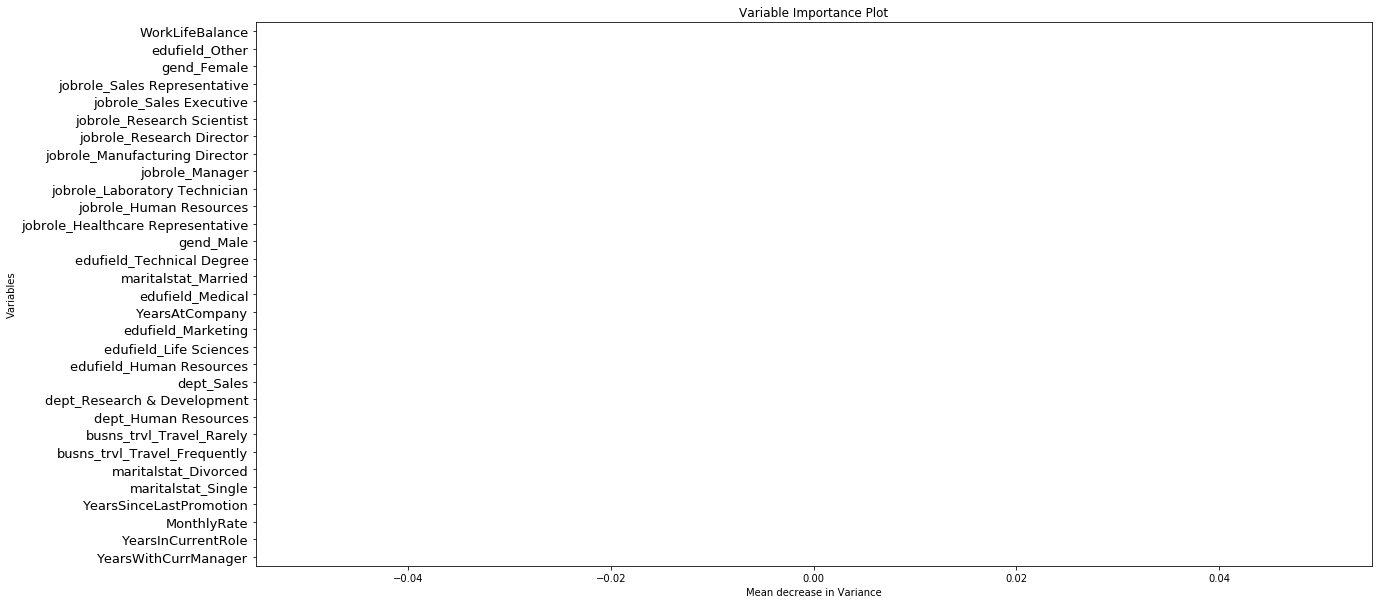

In [113]:
model_ranks = pd.Series(rf_fit.feature_importances_,index=x_train.columns, name='Importance').sort_values(ascending=False, inplace=False)
model_ranks.index.name = 'Variables'
top_features = model_ranks.iloc[:31].sort_values(ascending=True,inplace=False)
plt.figure(figsize=(20,10))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Variance')
_ = ax.set_yticklabels(top_features.index, fontsize=13)






- From the variable importance plot, it seems that the Worklifebalance variable seems to be most significant, followed by .
- This provides us some nisight into what are major contributing factors that determine whether the employee will ramain with the
company or leave the organization.


# Random Forest Classifier- Grid Search

-  Tuning parameters in machine learning is plays a critical role.
- Here we showing the grid search example on how to tune a random forest method.


- Tuning paramter are similar to random forest parameters apart from verifying all the combinations to be evaluted will be
(3*3*2*2)*5=36*5=180 combinations.
- Here 5 is used in the end, due to the cross validation of five fold.

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

pipeline = Pipeline([
        ('clf',RandomForestClassifier(criterion='gini',class_weight = {0:0.3,1:0.7}))])

parameters = {
        'clf__n_estimators':(2000,3000,5000),
        'clf__max_depth':(5,15,30),
        'clf__min_samples_split':(2,3),
        'clf__min_samples_leaf':(1,2)  }

grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)

print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(x_test)

print ("Testing accuracy:",round(accuracy_score(y_test, predictions),4))
print ("\nComplete report of Testing data\n",classification_report(y_test, predictions))
print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n",pd.crosstab(y_test, predictions,rownames = ["Actuall"],colnames = ["Predicted"]))      




Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 15.4min finished


Best Training score: 0.868
Best parameters set:
	clf__max_depth: 5
	clf__min_samples_leaf: 1
	clf__min_samples_split: 3
	clf__n_estimators: 5000
Testing accuracy: 0.873

Complete report of Testing data
              precision    recall  f1-score   support

          0       0.88      0.98      0.93       380
          1       0.63      0.20      0.30        61

avg / total       0.85      0.87      0.84       441



Random Forest Grid Search- Test Confusion Matrix

 Predicted    0   1
Actuall           
0          373   7
1           49  12


# AdaBoost Classifier

- Boosting is the anothet state pf art model that is being used by many data scientists to win so many competitions.
- In this section we will covering the Adaboost algorithm, followed by gradient boost and extreme gradient boost(XGBoost).
- Boosting is a general apporch that can applied to many statistical models.
- In bagging, we have taken multiple samples from the traing data and then combined the resultes of individual trees to create
 a single prediction model; this methos runs in parallel, as each boostrap samples does not depends on others.
- Boosting workers in sequential manner and does not onvolve bootstrap sampling; instead, each tree is fitted in the modified
 version of an original datasets and finally added up to create a strong classifier.

- Iteration 1:- 
                Initially, a simple classifier has been fitted on the data, also called as Decision Stump, which split the data into two regions and whatever the classes correctly classified will be given less weightage in the next iteration.
------------------------------------------------------------------------------------------------------------------------------
- Iteration 2:-
                Higher weightage for misclassified classes, and again another decision stump/weak classifier will be fitted on the data and will change the weight again for the next itreation.
-------------------------------------------------------------------------------------------------------------------------------
- Iteration 3:-
                Once it finishes the iterations, these are combined with weights( weights automatically calculated for each
classifier at each iteration based on error rate), to come with strong classifir, which predictes the classes with surprising accuracy.

- In Bagging and random forest algorithms, we deal with the columns of the data; whereas, in boosting, we adjust the weights of each
observations and dont elect a few columns.

*****************************************************************************************************************************
Higher weights will be given for the model with fewer errors.

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

Deciosion Stump is used as base classifier for AdaBoost. If we observer the following code, the depth of the treee remaines as 1,
which has the decision taking ability only once also considered a weak classifier.

- In AdaBoost, decision stump has been used as a base estimator to fit on whole dataset and then fits additional copies of the classifier
 on the same dataset up to 5000 times.
- The learning rate shrinks the contribution of each classifier by 0.05.


In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=1)

adabst_fit = AdaBoostClassifier(base_estimator= dtree,
        n_estimators=5000,learning_rate=0.05,random_state=42)

adabst_fit.fit(x_train, y_train)

print ("\nAdaBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,adabst_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Train accuracy",round(accuracy_score(y_train,adabst_fit.predict(x_train)),3))
print ("\nAdaBoost  - Train Classification Report\n",classification_report(y_train,adabst_fit.predict(x_train)))

print ("\n\nAdaBoost  - Test Confusion Matrix\n\n",pd.crosstab(y_test,adabst_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Test accuracy",round(accuracy_score(y_test,adabst_fit.predict(x_test)),3))
print ("\nAdaBoost - Test Classification Report\n",classification_report(y_test,adabst_fit.predict(x_test)))




AdaBoost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          844    9
1           55  121

AdaBoost  - Train accuracy 0.938

AdaBoost  - Train Classification Report
              precision    recall  f1-score   support

          0       0.94      0.99      0.96       853
          1       0.93      0.69      0.79       176

avg / total       0.94      0.94      0.93      1029



AdaBoost  - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          360  20
1           38  23

AdaBoost  - Test accuracy 0.868

AdaBoost - Test Classification Report
              precision    recall  f1-score   support

          0       0.90      0.95      0.93       380
          1       0.53      0.38      0.44        61

avg / total       0.85      0.87      0.86       441



The result of the AdaBoost seems to be much better than the know best random forest classifiers in terms of the recall
of 1 value.
Though there is slight decrease in accuracy to 86.6% to compared with the best accuracy 87.8%, the number of 1s predicted is 23 from the RF,
which is 14 with same expences of increase in 0s, but it really made good progress in terms of indentifying actual attriters.

# Gradient Boosting Classifiers

In [1]:
# Gradientboost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc_fit = GradientBoostingClassifier(loss='deviance',learning_rate=0.05,n_estimators=5000,
                                     min_samples_split=2,min_samples_leaf=1,max_depth=1,random_state=42 )
gbc_fit.fit(x_train,y_train)

print ("\nGradient Boost - Train Confusion Matrix\n\n",pd.crosstab(y_train,gbc_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nGradient Boost - Train accuracy",round(accuracy_score(y_train,gbc_fit.predict(x_train)),3))
print ("\nGradient Boost  - Train Classification Report\n",classification_report(y_train,gbc_fit.predict(x_train)))

print ("\n\nGradient Boost - Test Confusion Matrix\n\n",pd.crosstab(y_test,gbc_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nGradient Boost - Test accuracy",round(accuracy_score(y_test,gbc_fit.predict(x_test)),3))
print ("\nGradient Boost - Test Classification Report\n",classification_report(y_test,gbc_fit.predict(x_test)))



KeyboardInterrupt: 

# Ensemble of ensembles with samples using a single type of classifier

XGBoost is the new algorithm developed in 2014 by tianqi Chen based on Gradient Boosting principles. it has created storm in the data science
community since its inception. XGBoost has been developed with deep consideration in terms of system optimazation and principles in machine learning.
The goal of library is to push the extremes of the computaion limits of machine to provide scalable, portable, and accurate results.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [26]:
clwght = {0:0.3,1:0.7}

In [27]:
eoe_dtree = DecisionTreeClassifier(criterion='gini',max_depth=1,class_weight=clwght)

Eech AdaBoost classifier consist of 500 decision trees with learning rate of 0.5.

In [28]:
eoe_adabst_fit = AdaBoostClassifier(base_estimator=eoe_dtree,n_estimators=500,learning_rate=0.5,random_state=42)

In [29]:
eoe_adabst_fit.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='gini',
            max_depth=1, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=500, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

clwght = {0:0.3,1:0.7}

eoe_dtree = DecisionTreeClassifier(criterion='gini',max_depth=1,class_weight = clwght)
eoe_adabst_fit = AdaBoostClassifier(base_estimator= eoe_dtree,
        n_estimators=500,learning_rate=0.05,random_state=42)
eoe_adabst_fit.fit(x_train, y_train)

print ("\nAdaBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,eoe_adabst_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost - Train accuracy",round(accuracy_score(y_train,eoe_adabst_fit.predict(x_train)),3))
print ("\nAdaBoost  - Train Classification Report\n",classification_report(y_train,eoe_adabst_fit.predict(x_train)))

print ("\n\nAdaBoost - Test Confusion Matrix\n\n",pd.crosstab(y_test,eoe_adabst_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost - Test accuracy",round(accuracy_score(y_test,eoe_adabst_fit.predict(x_test)),3))
print ("\nAdaBoost - Test Classification Report\n",classification_report(y_test,eoe_adabst_fit.predict(x_test)))


bag_fit = BaggingClassifier(base_estimator= eoe_adabst_fit,n_estimators=50,
                            max_samples=1.0,max_features=1.0,
                            bootstrap=True,
                            bootstrap_features=False,
                            n_jobs=-1,
                            random_state=42)

bag_fit.fit(x_train, y_train)

print ("\nEnsemble of AdaBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,bag_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nEnsemble of AdaBoost - Train accuracy",round(accuracy_score(y_train,bag_fit.predict(x_train)),3))
print ("\nEnsemble of AdaBoost  - Train Classification Report\n",classification_report(y_train,bag_fit.predict(x_train)))

print ("\n\nEnsemble of AdaBoost - Test Confusion Matrix\n\n",pd.crosstab(y_test,bag_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nEnsemble of AdaBoost - Test accuracy",round(accuracy_score(y_test,bag_fit.predict(x_test)),3))
print ("\nEnsemble of AdaBoost - Test Classification Report\n",classification_report(y_test,bag_fit.predict(x_test)))











AdaBoost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          806   47
1           63  113

AdaBoost - Train accuracy 0.893

AdaBoost  - Train Classification Report
              precision    recall  f1-score   support

          0       0.93      0.94      0.94       853
          1       0.71      0.64      0.67       176

avg / total       0.89      0.89      0.89      1029



AdaBoost - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          349  31
1           34  27

AdaBoost - Test accuracy 0.853

AdaBoost - Test Classification Report
              precision    recall  f1-score   support

          0       0.91      0.92      0.91       380
          1       0.47      0.44      0.45        61

avg / total       0.85      0.85      0.85       441


Ensemble of AdaBoost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          824   29
1           69  107

Ensemble of AdaBoost - Train accuracy 0.905

Ensemble of AdaBoo